## list of array functions in Numphy here:
https://numpy.org/doc/stable/reference/routines.html

# Working with numerical data

The "data" in Data Analysis typically refers to numerical data, e.g., stock prices, sales figures, sensor measurements, sports scores, database tables, etc. The Numpy library provides specialized data structures, functions, and other tools for numerical computing in Python. Let's work through an example to see why & how to use Numpy for working with numerical data.

Suppose we want to use climate data like the temperature, rainfall, and humidity to determine if a region is well suited for growing apples. A simple approach for doing this would be to formulate the relationship between the annual yield of apples (tons per hectare) and the climatic conditions like the average temperature (in degrees Fahrenheit), rainfall (in millimeters) & average relative humidity (in percentage) as a linear equation.

yield_of_apples = w1 * temperature + w2 * rainfall + w3 * humidity

We're expressing the yield of apples as a weighted sum of the temperature, rainfall, and humidity. This equation is an approximation since the actual relationship may not necessarily be linear, and there may be other factors involved. But a simple linear model like this often works well in practice.

Based on some statical analysis of historical data, we might come up with reasonable values for the weights w1, w2, and w3. Here's an example set of values:


Given some climate data for a region, we can now predict the yield of apples. Here's some sample data:

![Chart](https://i.imgur.com/TXPBiqv.png)


To begin, we can define some variables to record climate data for a region.

In [39]:
w1, w2, w3 = 0.3, 0.2, 0.5

In [43]:
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

In [21]:
weight = [w1,w2,w3]

# ZIP :-
n is used to combine two or more iterables (like lists, tuples, etc.) element-wise into pairs (or tuples).


In [49]:
# Example of ZIP

names = ["Avi","Sam","Sre"]
scores = [40,80,100]

zipped = zip(names,scores) # output basically in tuple 
print(list(zipped))    # change tuple to list

[('Avi', 40), ('Sam', 80), ('Sre', 100)]


In [53]:
for item in zip(kanto,weight):
    print(item)

(73, 0.3)
(67, 0.2)
(43, 0.5)


In [57]:
for x,w in zip(kanto,weight):
    print(x) #kanto
    print(w) #weight


73
0.3
67
0.2
43
0.5



## Function for yield_of_apples

In [263]:
def yield_of_apples(region,weight):
    result = 0
    for r,w in zip(region,weight):
        result += r * w

    return result

In [265]:
yield_of_apples(kanto,weight)

56.8

In [64]:
yield_of_apples(johto,weight)

76.9

In [1]:
import numpy as np

## Going from Python lists to Numpy arrays
The calculation performed by the crop_yield (element-wise multiplication of two vectors and taking a sum of the results) is also called the dot product. 

The Numpy library provides a built-in function to compute the dot product of two vectors. However, we must first convert the lists into Numpy arrays.


In [7]:
# can be installed the numpy like this :- ! pip install numpy 

In [27]:
import numpy as np

In [31]:
print(np.__version__)

1.26.4


In [33]:
kanto = np.array([73,67,43])

In [35]:
kanto

array([73, 67, 43])

In [41]:
weight = np.array([w1,w2,w3])

In [97]:
weight

array([0.3, 0.2, 0.5])

In [79]:
type(kanto)

numpy.ndarray

In [81]:
type(weight)

numpy.ndarray

In [103]:
weight[0]

0.3

## Operating on Numpy arrays

We can now compute the dot product of the two vectors using the `np.dot` function.

In [ ]:
help(np.dot)

In [45]:
np.dot(kanto,weight)

56.8

We can achieve the same result with low-level operations supported by Numpy arrays: performing an element-wise multiplication and calculating the resulting numbers' sum.

In [52]:
(kanto*weight).sum()

56.8

The `*` operator performs an element-wise multiplication of two arrays if they have the same size. The `sum` method calculates the sum of numbers in an array.

In [71]:
arr1 = np.array([1,1,2])
arr2 = np.array([9,8,7])

In [73]:
arr1 * arr2

array([ 9,  8, 14])

In [75]:
arr1.sum()

4

## Benefits of using Numpy arrays

Numpy arrays offer the following benefits over Python lists for operating on numerical data:

- **Ease of use**: You can write small, concise, and intuitive mathematical expressions like `(kanto * weights).sum()` rather than using loops & custom functions like `crop_yield`.
- **Performance**: Numpy operations and functions are implemented internally in C++, which makes them much faster than using Python statements & loops that are interpreted at runtime

Here's a comparison of dot products performed using Python loops vs. Numpy arrays on two vectors with a million elements each.

In [176]:
#python arrays
arr1 = list(range(1000000))
arr2 = list(range(1000000,2000000))

#Numpy arrays
arr1_np = np.array(arr1, dtype=np.int64) #dtype=np.int64 is used avoid the overflow and -ve val
arr2_np = np.array(arr2 , dtype=np.int64)

# %%time :-
It is the jupyter magic command that measure the time it take to run the entire cell. It is very usefull when you're comparing the speed of different approaches(like list vs numpy arrays)

In [179]:
%%time

result=0
for a1, a2 in zip(arr1,arr2):
    result += a1*a2

result

CPU times: total: 422 ms
Wall time: 442 ms


833332333333500000

In [183]:
%%time

np.dot(arr1_np,arr2_np) #less time taken and it is really usefull for large datasets

CPU times: total: 0 ns
Wall time: 2.02 ms


833332333333500000

## WALL TIME:- 
is the actual time taken from the start to finish to execute a block of code 


## Multi-dimensional Numpy arrays 
we can represent the climate data for all the regions using a single 2-dimensional Numpy array.Each row represents one region, and the columns represent temperature, rainfall, and humidity, respectively.

In [192]:
climate_data = np.array([[73, 67, 43],
                         [91, 88, 64],
                         [87, 134, 58],
                         [102, 43, 37],
                         [69, 96, 70]])

In [194]:
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

Numpy arrays can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of an array.

<img src="https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png" width="420">


In [217]:
# 1D Array
weight.shape

(3,)

In [219]:
#2d array (matrix) 
climate_data.shape 

(5, 3)

In [227]:
# 3D array 
arr3 = np.array([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.5]]])

In [229]:
arr3.shape

(2, 2, 3)

# datatype in Numpy
## Common Numpy Data type (dtypes) :-

Data type    

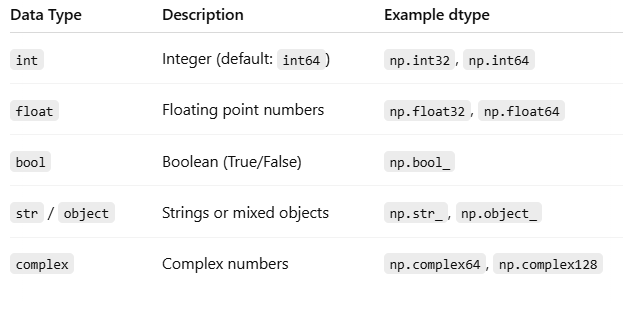

##  How to check an array's data type:

In [233]:
weight.dtype

dtype('float64')

In [242]:
arri = np.array([1,2,2,3])
print(arri.dtype)

int32


In [255]:
arr3 = np.array([1,2,3,4.9]) # If an array contains even a single floating point number, all the other elements are also converted to floats.
print(arr3.dtype)

float64


## How to set a specific data type

In [247]:
arri = np.array([1,2,2,3], np.float32)
print(arri.dtype)

float32


In [249]:
climate_data.dtype

dtype('int32')

We can now compute the predicted yields of apples in all the regions, using a single matrix multiplication between `climate_data` (a 5x3 matrix) and `weights` (a vector of length 3). Here's what it looks like visually:

<img src="https://i.imgur.com/LJ2WKSI.png" width="240">


# MATRIX MULTIPLICATION
## 1. using matmul :- 
## 2. using @ :-

In [278]:
#1.
np.matmul(climate_data, weight) 

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [282]:
#2.
climate_data @ weight

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [267]:
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

## Working with CSV data files

Numpy also provides helper functions reading from & writing to files. Let's download a file `climate.txt`, which contains 10,000 climate measurements (temperature, rainfall & humidity) in the following format:


```
temperature,rainfall,humidity
25.00,76.00,99.00
39.00,65.00,70.00
59.00,45.00,77.00
84.00,63.00,38.00
66.00,50.00,52.00
41.00,94.00,77.00
91.00,57.00,96.00
49.00,96.00,99.00
67.00,20.00,28.00
...
```

This format of storing data is known as *comma-separated values* or CSV. 

> **CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)


To read this file into a numpy array, we can use the `genfromtxt` function.

In [291]:
import urllib.request

urllib.request.urlretrieve(
    'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv', 
    'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x231138b8e30>)

## genfromtxt :-
numpy's fuction to load the contents of climate.txt into numpy array.
#### climate_data = np.genfromtxt('climate.txt',delimiter=',',skip_header = 1)
#### climate_data => array 
#### climate.txt=>
 file from which content load
#### delimiter=',' => 
Tells NumPy that the data is comma-separated (CSV format).
#### skip_header=1 => 
skip the 1st row , assuming it's a header with col names (e.g., "temperature, rainfall, humidity").

In [297]:
climate_data = np.genfromtxt('climate.txt',delimiter=',',skip_header = 1)

In [299]:
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [307]:
climate_data.shape

(10000, 3)

We can now perform a matrix multiplication using the @ operator to predict the yield of apples for the entire dataset using a given set of weights.



In [326]:
yields = climate_data @ weight

In [328]:
yields

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [330]:
yields.shape

(10000,)

 ## add col yeild to the 4th col of climate_data
Let's add the `yields` to `climate_data` as a fourth column using the [`np.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function.

In [347]:
climate_results = np.concatenate((climate_data, yields.reshape(10000,1)),axis =1)

## Examplation of np.concatenate
 #### 1. climate_data => 
a numpy array of shape(1000,3) - each row likely contains[temp,rainfall,humidity]
#### 2. yields.reshape(10000, 1) =>
reshapes the yields arr from 1D(10000,) to 2D (10000,1)
#### 3. np.concatenate(..., axis=1) =>
means joining the colums HORIZONTALLYSo now each row will have 4 values: [temperature, rainfall, humidity, yield]

In [349]:
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

# np.savetxt
Let's write the final results from our computation above back to a file using the `np.savetxt` function.
##### np.savetxt('climate_results.txt',climate_results, fmt='%.2f',delimiter=',', header=                           'temperature,rainfall,humidity,yield_of_apples', comments='') 
### 'climate_results.txt'
→ The name of the new file you are creating (it will save in your current working directory).
### climate_results
→ The data array you want to save (your array with 4 columns)
### fmt='%.2f'
→ Format each number with 2 decimal places (e.g., 23.45, 78.90).
### delimiter=','
→ Use a comma to separate columns (just like in a CSV file).
### header=
'temperature,rainfall,humidity,yeild_apples'
→ Write this first line as the header (column names).
### comments=''
→ Normally, headers are prefixed with a # character.
→ Setting comments='' removes the #, so it looks clean.

In [ ]:
 np.savetxt('climate_results.txt',climate_results,
             fmt='%.2f',delimiter=',',header= 'temperature,rainfall,humidity,yield_of_apples',
            comments='')

 ## 🟢 Now view the our new climate_results.txt file

### genfromtxt without skip_header =1
NumPy is built for numerical computing, so functions like np.genfromtxt() are designed to load numeric data efficiently.

If it encounters non-numeric values (like column headers or strings), and you're not handling them properly (e.g., using skip_header=1), NumPy will insert nan in place — because it doesn't know what to do with text when it's expecting numbers.

### 1. Using genfromtxt n print

In [431]:
result=  np.genfromtxt('climate_results.txt',delimiter=',',skip_header=1)
print(result[:5])

[[25.  76.  99.  72.2]
 [39.  65.  70.  59.7]
 [59.  45.  77.  65.2]
 [84.  63.  38.  56.8]
 [66.  50.  52.  55.8]]


### 2. Using pandas 

In [429]:
import pandas as pd

df = pd.read_csv('climate_results.txt')
print(df.head(10)) # without argument it show 5 row only

   temperature  rainfall  humidity  yield_of_apples
0         25.0      76.0      99.0             72.2
1         39.0      65.0      70.0             59.7
2         59.0      45.0      77.0             65.2
3         84.0      63.0      38.0             56.8
4         66.0      50.0      52.0             55.8
5         41.0      94.0      77.0             69.6
6         91.0      57.0      96.0             86.7
7         49.0      96.0      99.0             83.4
8         67.0      20.0      28.0             38.1
9         85.0      31.0      95.0             79.2


### 3. Using Python's Open fucn

In [436]:
with open('climate_results.txt','r') as c_file: # WITH:- This is a context manager — it automatically closes the file after you're done reading. No need to write file.close(). 
    for i in range(5):
        print(c_file.readline().strip()) #STRIP:- Removes any extra spaces, newlines (\n), or tabs at the beginning or end of the line.

temperature,rainfall,humidity,yield_of_apples
25.00,76.00,99.00,72.20
39.00,65.00,70.00,59.70
59.00,45.00,77.00,65.20
84.00,63.00,38.00,56.80


Numpy provides hundreds of functions for performing operations on arrays. Here are some commonly used functions:

Mathematics: np.sum, np.exp, np.round, arithemtic operators
Array manipulation: np.reshape, np.stack, np.concatenate, np.split
Linear Algebra: np.matmul, np.dot, np.transpose, np.eigvals
Statistics: np.mean, np.median, np.std, np.max

# Arithmetic operations, broadcasting and comparison
Numpy arrays support arithmetic operators like +, -, *, etc. You can perform an arithmetic operation with a single number (also called scalar) or with another array of the same shape. Operators make it easy to write mathematical expressions with multi-dimensional arrays.

In [441]:
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [445]:
arr3 = np.array([[11, 12, 13, 14], 
                 [15, 16, 17, 18], 
                 [19, 11, 12, 13]])

In [451]:
# Adding a scalar
arr2+ 100

array([[101, 102, 103, 104],
       [105, 106, 107, 108],
       [109, 101, 102, 103]])

In [453]:
# Element-wise Adition 
arr2+arr3

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 12, 14, 16]])

In [455]:
# Element-wise subtraction
arr3-arr2

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [457]:
# Division by scalar
arr2 / 2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [459]:
# Element-wise multiplication
arr2 * arr3

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [461]:
# Modulus with scalar
arr2 % 4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]], dtype=int32)

## Array Broadcasting

Numpy arrays also support *broadcasting*, allowing arithmetic operations between two arrays with different numbers of dimensions but compatible shapes. Let's look at an example to see how it works.

In [470]:
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [472]:
arr2.shape

(3, 4)

In [474]:
arr4 = np.array([4, 5, 6, 7])

In [476]:
arr4.shape

(4,)

In [468]:
arr2 + arr4

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

When the expression `arr2 + arr4` is evaluated, `arr4` (which has the shape `(4,)`) is replicated three times to match the shape `(3, 4)` of `arr2`. Numpy performs the replication without actually creating three copies of the smaller dimension array, thus improving performance and using lower memory.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" width="360">

Broadcasting only works if one of the arrays can be replicated to match the other array's shape.

## Array Comparison

Numpy arrays also support comparison operations like `==`, `!=`, `>` etc. The result is an array of booleans.

In [480]:
arr1 = np.array([[1, 2, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [1, 2, 5]])

In [482]:
arr1 == arr2

array([[False,  True,  True],
       [False, False,  True]])

In [484]:
arr1 != arr2

array([[ True, False, False],
       [ True,  True, False]])

In [486]:
arr1 >= arr2

array([[False,  True,  True],
       [ True,  True,  True]])

In [488]:
arr1 < arr2

array([[ True, False, False],
       [False, False, False]])

Array comparison is frequently used to count the number of equal elements in two arrays using the `sum` method. Remember that `True` evaluates to `1` and `False` evaluates to `0` when booleans are used in arithmetic operations.

In [495]:
(arr1 == arr2).sum()

3

# Array indexing and slicing

Numpy extends Python's list indexing notation using `[]` to multiple dimensions in an intuitive fashion. You can provide a comma-separated list of indices or ranges to select a specific element or a subarray (also called a slice) from a Numpy array.

In [7]:
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]])

In [9]:
arr3.shape

(3, 2, 4)

In [11]:
# Single element
arr3[1, 1, 2]

36.0

In [15]:
arr3[1:,0:1,:2]

array([[[15., 16.]],

       [[98., 32.]]])

In [19]:
# Mixing indices and ranges
arr3[1:, 1, 3]

array([18., 43.])

In [21]:
# Using fewer indices
arr3[1]

array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [23]:
# Using fewer indices
arr3[:2, 1]

array([[13., 14., 15., 19.],
       [63., 92., 36., 18.]])

In [25]:
arr3

array([[[11. , 12. , 13. , 14. ],
        [13. , 14. , 15. , 19. ]],

       [[15. , 16. , 17. , 21. ],
        [63. , 92. , 36. , 18. ]],

       [[98. , 32. , 81. , 23. ],
        [17. , 18. , 19.5, 43. ]]])

In [ ]:
# Using too many indices
arr3[1,3,2,1]  # this show error

## Other ways of creating Numpy arrays

Numpy also provides some handy functions to create arrays of desired shapes with fixed or random values. Check out the [official documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html) or use the `help` function to learn more.

In [32]:
# All zeros
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [56]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [58]:
np.random.rand(5) # (generate a 1d array with 5 randon, that no are float btw 0 to 1(including 0 but less than 1)

array([0.06029751, 0.70699572, 0.35342279, 0.90807494, 0.70717221])

In [62]:
np.random.randn(2,3) # and generate rand no. from standard normal distribution (mean=0, sd=1), the val can be +ve or -ve 

array([[ 0.43957915, -1.57849458, -1.80255321],
       [ 1.4446245 ,  0.53190518, -0.36217912]])

In [68]:
#fixexd value
np.full([2,3],100)

array([[100, 100, 100],
       [100, 100, 100]])

In [74]:
# Range with start, end and step
np.arange(10,100,5)

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])

In [110]:
arr = np.arange(10,100,3)
arr.reshape(3, 5, -1)  # numpy will automatically figure out that the last dimension must be 2


array([[[10, 13],
        [16, 19],
        [22, 25],
        [28, 31],
        [34, 37]],

       [[40, 43],
        [46, 49],
        [52, 55],
        [58, 61],
        [64, 67]],

       [[70, 73],
        [76, 79],
        [82, 85],
        [88, 91],
        [94, 97]]])

In [116]:
np.linspace(3,27,9) #start is exactly start (3). End is exactly end (27). Exactly 9 numbers. Evenly spaced.

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])